In [1]:
%matplotlib notebook

The qRT PCR machine exports an excel sheet with all information which is used as the basis for the analysis done here

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors

# to import package in parent folder first add the parent folder to path
import sys
import os
packages_path = Path(os.path.dirname(os.path.realpath('__file__'))).parent
sys.path.insert(0, str(packages_path))

import shared_func

In [3]:
home_path = os.getcwd()

filepath = Path(home_path, 'Fig2_data')
savepath = Path(home_path, 'plots')
savepath_SI = Path(home_path, 'plots\\SI')
stat_savepath = Path(home_path, 'stats')

Path(savepath).mkdir(parents=True, exist_ok=True) 
Path(savepath_SI).mkdir(parents=True, exist_ok=True) 
Path(stat_savepath).mkdir(parents=True, exist_ok=True)

These are the notes used to plan the experiment and updated as pipetting of the plate was done.

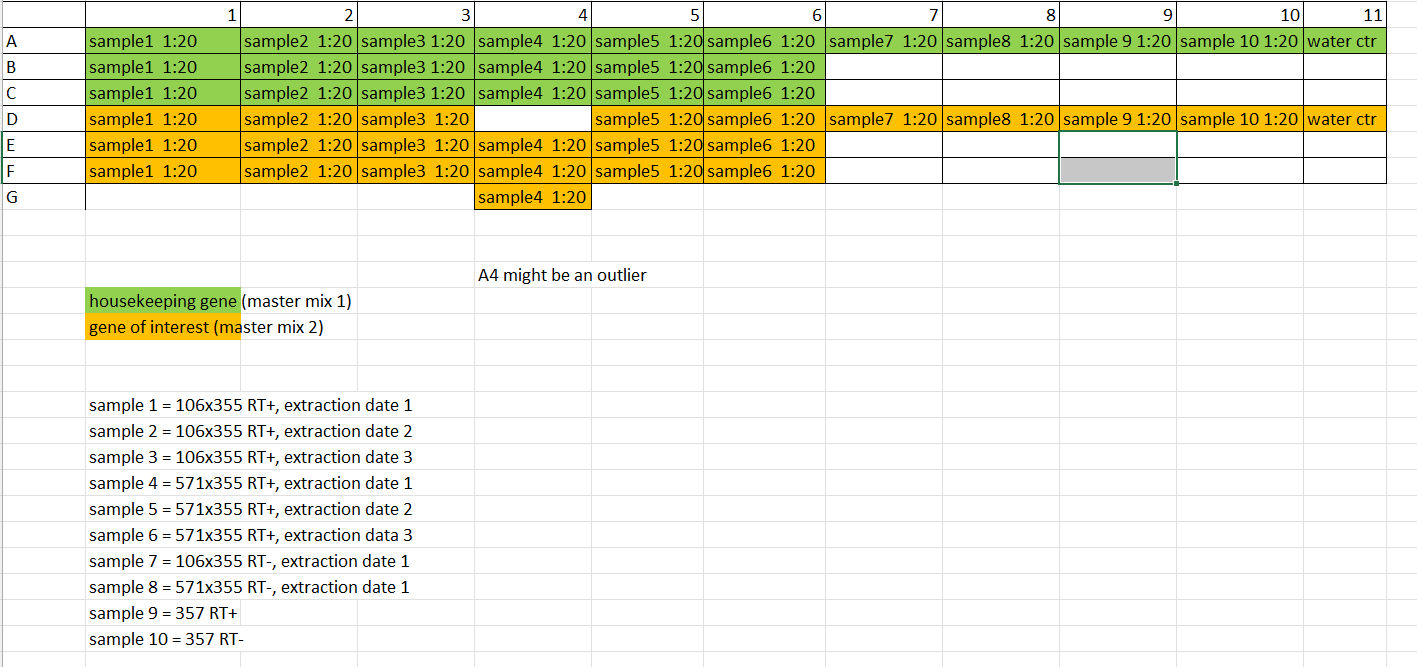

In [4]:
# Prepare lists based on the screenshot above
sample_1_housekeeping = ['A1', 'B1', 'C1']
sample_2_housekeeping = ['A2', 'B2', 'C2']
sample_3_housekeeping = ['A3', 'B3', 'C3']
sample_4_housekeeping = ['A4', 'B4', 'C4'] # note during experiment: A4 might be an outlier. 23/02/23 - checked, no outlier
sample_5_housekeeping = ['A5', 'B5', 'C5']
sample_6_housekeeping = ['A6', 'B6', 'C6']
sample_7_housekeeping = ['A7'] # RT- control of Sample 1
sample_8_housekeeping = ['A8'] # RT- control of Sample 4
sample_9_housekeeping = ['A9'] # no chrimson control, RT+
sample_10_housekeeping = ['A10'] # no chrimson control, RT-
sample_11_housekeeping = ['A11'] # no template control

sample_1_exp = ['D1', 'E1', 'F1']
sample_2_exp = ['D2', 'E2', 'F2']
sample_3_exp = ['D3', 'E3', 'F3']
sample_4_exp = ['G4', 'E4', 'F4']
sample_5_exp = ['D5', 'E5', 'F5']
sample_6_exp = ['D6', 'E6', 'F6']
sample_7_exp = ['D7'] # RT- control of Sample 1
sample_8_exp = ['D8'] # RT- control of Sample 4
sample_9_exp = ['D9'] # no chrimson control, RT+
sample_10_exp = ['D10'] # no chrimson control, RT- 
sample_11_exp = ['D11'] # no template control

In [5]:
excel_file_Ct = pd.read_excel(Path(filepath, '2022-11-25_132542.xls'),
                                  sheet_name='Results',
                                  header=47)

# Plot median Ct values

In [6]:
def median_CT_func(data):
    current_CT = []

    for current_sample in data:
        current_CT.append(excel_file_Ct['CT'][excel_file_Ct['Well Position'] == current_sample])
    median_CT = np.median(np.array(current_CT))
    return(median_CT)

median_CT_sample_1_housekeeping = median_CT_func(sample_1_housekeeping)
median_CT_sample_2_housekeeping = median_CT_func(sample_2_housekeeping)
median_CT_sample_3_housekeeping = median_CT_func(sample_3_housekeeping)

median_CT_sample_4_housekeeping = median_CT_func(sample_4_housekeeping)
median_CT_sample_5_housekeeping = median_CT_func(sample_5_housekeeping)
median_CT_sample_6_housekeeping = median_CT_func(sample_6_housekeeping)

median_CT_sample_1_exp = median_CT_func(sample_1_exp)
median_CT_sample_2_exp = median_CT_func(sample_2_exp)
median_CT_sample_3_exp = median_CT_func(sample_3_exp)

median_CT_sample_4_exp = median_CT_func(sample_4_exp)
median_CT_sample_5_exp = median_CT_func(sample_5_exp)
median_CT_sample_6_exp = median_CT_func(sample_6_exp)

<IPython.core.display.Javascript object>


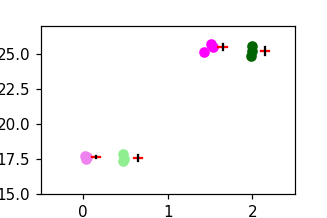

ShapiroResult(statistic=0.9134236574172974, pvalue=0.42960265278816223)
ShapiroResult(statistic=0.9201289415359497, pvalue=0.45278841257095337)
LeveneResult(statistic=0.7688178457767235, pvalue=0.43008714403272225)
Ttest_indResult(statistic=0.2918519153695895, pvalue=0.7849104068092826)


ShapiroResult(statistic=0.9895415306091309, pvalue=0.8043413758277893)
ShapiroResult(statistic=0.9991464614868164, pvalue=0.9441917538642883)
LeveneResult(statistic=0.09553114869529918, pvalue=0.7726899147523303)
Ttest_indResult(statistic=0.9445990920268208, pvalue=0.3983493928403068)


In [7]:
fig = plt.figure(figsize=(3,2))
ax = fig.add_subplot(111)
median_106x355_housekeeping = [median_CT_sample_1_housekeeping,
                               median_CT_sample_2_housekeeping,
                               median_CT_sample_3_housekeeping]
ax.scatter(np.random.normal(0, 0.03, size=3), # X points
           median_106x355_housekeeping, c = 'violet')

median_571x355_housekeeping = [median_CT_sample_4_housekeeping,
                               median_CT_sample_5_housekeeping,
                               median_CT_sample_6_housekeeping]
ax.scatter(np.random.normal(0.5, 0.03, size=3), # X points, 
                    median_571x355_housekeeping, c = 'lightgreen')

median_median_106x355_housekeeping = np.median(np.array((median_106x355_housekeeping)))
median_median_571x355_housekeeping = np.mean(np.array((median_571x355_housekeeping)))

std_median_106x355_housekeeping = np.std(np.array((median_106x355_housekeeping)))
std_median_571x355_housekeeping = np.std(np.array((median_571x355_housekeeping)))

# Plot mean bar
ax.plot([.1,.2], [median_median_106x355_housekeeping, median_median_106x355_housekeeping], c='r')
ax.plot([.6,.7], [median_median_571x355_housekeeping, median_median_571x355_housekeeping], c='r')

# Plot Standard Error
ax.plot([.15, .15], [median_median_106x355_housekeeping-std_median_106x355_housekeeping, 
                     median_median_106x355_housekeeping+std_median_106x355_housekeeping], c='k')
ax.plot([0.65, 0.65], [median_median_571x355_housekeeping-std_median_571x355_housekeeping, 
                       median_median_571x355_housekeeping+std_median_571x355_housekeeping], c='k')



median_106x355_Chrimson = [median_CT_sample_1_exp, 
                           median_CT_sample_2_exp,
                           median_CT_sample_3_exp]
ax.scatter(np.random.normal(1.5, 0.03, size=3), # X points, 
                            median_106x355_Chrimson, c = 'magenta')

median_571x355_Chrimson = [median_CT_sample_4_exp, 
                           median_CT_sample_5_exp,
                           median_CT_sample_6_exp]
ax.scatter(np.random.normal(2, 0.03, size=3), # X points, 
                    median_571x355_Chrimson, c = 'darkgreen')

median_median_106x355_Chrimson = np.median(np.array((median_106x355_Chrimson)))
median_median_571x355_Chrimson = np.mean(np.array((median_571x355_Chrimson)))

std_median_106x355_Chrimson = np.std(np.array((median_106x355_Chrimson)))
std_median_571x355_Chrimson = np.std(np.array((median_571x355_Chrimson)))

# Plot mean bar
ax.plot([1.6,1.7], [median_median_106x355_Chrimson, median_median_106x355_Chrimson], c='r')
ax.plot([2.1,2.2], [median_median_571x355_Chrimson, median_median_571x355_Chrimson], c='r')

# Plot Standard Error
ax.plot([1.65, 1.65], [median_median_106x355_Chrimson-std_median_106x355_Chrimson, 
                     median_median_106x355_Chrimson+std_median_106x355_Chrimson], c='k')
ax.plot([2.15, 2.15], [median_median_571x355_Chrimson-std_median_571x355_Chrimson, 
                       median_median_571x355_Chrimson+std_median_571x355_Chrimson], c='k')

ax.set_xlim(-0.5,2.5)
ax.set_ylim(15,27)

#print(lilliefors(median_106x355_housekeeping)) # needs at least 4 samples
#print(lilliefors(median_571x355_housekeeping))
print(stats.shapiro(median_106x355_housekeeping))
print(stats.shapiro(median_571x355_housekeeping))
print(stats.levene(median_106x355_housekeeping, median_571x355_housekeeping))
print(stats.ttest_ind(median_106x355_housekeeping, median_571x355_housekeeping))

print('\n')
print(stats.shapiro(median_106x355_Chrimson))
print(stats.shapiro(median_571x355_Chrimson))
print(stats.levene(median_106x355_Chrimson, median_571x355_Chrimson))
print(stats.ttest_ind(median_106x355_Chrimson, median_571x355_Chrimson))

fig.savefig(Path(savepath_SI, 'S3B.svg'))

# Export statistics

In [8]:
data = [[np.array(median_106x355_housekeeping), np.array(median_571x355_housekeeping)],
        [np.array(median_106x355_Chrimson), np.array(median_571x355_Chrimson)]]
label_list = [['Gal4+, Rpl32', 'Gal4-, Rpl32'],
              ['Gal4+, Chrimson', 'Gal4-, Chrimson']]
savename='S3B'

shared_func.export_pairwise_test(data, label_list, 
                                 savepath=stat_savepath, savename=savename,
                                 parametric=True)

             Group  n       mean     median       STD       SEM  \
0     Gal4+, Rpl32  3  17.625340  17.660103  0.083541  0.027847   
1     Gal4-, Rpl32  3  17.576259  17.487261  0.222675  0.074225   
2  Gal4+, Chrimson  3  25.465843  25.499184  0.230533  0.076844   
3  Gal4-, Chrimson  3  25.219737  25.231613  0.287430  0.095810   

                         95% CI on the mean  DOF statistical test  \
0    (17.37117251947667, 17.87950776820237)  4.0           T-test   
1  (16.898784383064267, 18.253733571444194)  NaN              NaN   
2     (24.7644610124957, 26.16722411730573)  4.0           T-test   
3    (24.345250257805038, 26.0942244838128)  NaN              NaN   

   t-statistic   p-value  Holm-Bonferroni corrected p-value significant  
0     0.291852  0.784910                           1.569821          NO  
1          NaN       NaN                                NaN         NaN  
2     0.944599  0.398349                           0.796699          NO  
3          NaN       N

# Plot mean Ct values

In [9]:
def mean_CT_func(data):
    current_CT = []

    for current_sample in data:
        current_CT.append(excel_file_Ct['CT'][excel_file_Ct['Well Position'] == current_sample])
    mean_CT = np.mean(np.array(current_CT))
    return(mean_CT)

In [10]:
mean_CT_sample_1_housekeeping = mean_CT_func(sample_1_housekeeping)
mean_CT_sample_2_housekeeping = mean_CT_func(sample_2_housekeeping)
mean_CT_sample_3_housekeeping = mean_CT_func(sample_3_housekeeping)

mean_CT_sample_4_housekeeping = mean_CT_func(sample_4_housekeeping)
mean_CT_sample_5_housekeeping = mean_CT_func(sample_5_housekeeping)
mean_CT_sample_6_housekeeping = mean_CT_func(sample_6_housekeeping)

mean_CT_sample_1_exp = mean_CT_func(sample_1_exp)
mean_CT_sample_2_exp = mean_CT_func(sample_2_exp)
mean_CT_sample_3_exp = mean_CT_func(sample_3_exp)

mean_CT_sample_4_exp = mean_CT_func(sample_4_exp)
mean_CT_sample_5_exp = mean_CT_func(sample_5_exp)
mean_CT_sample_6_exp = mean_CT_func(sample_6_exp)

<IPython.core.display.Javascript object>


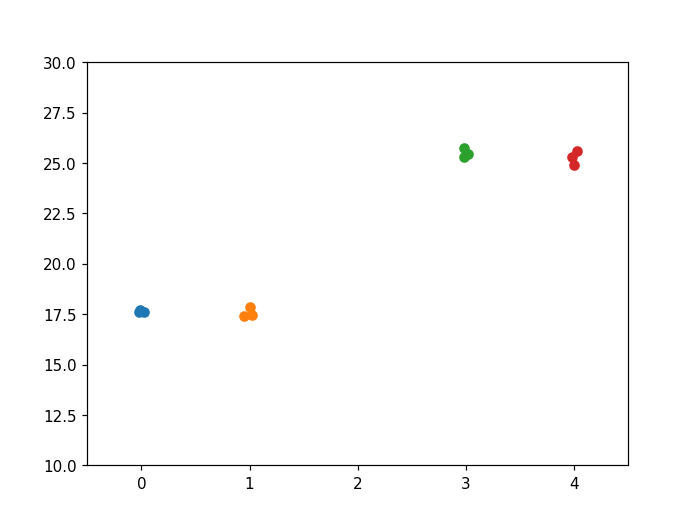

(10.0, 30.0)

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.random.normal(0, 0.03, size=3), # X points
           [mean_CT_sample_1_housekeeping,
            mean_CT_sample_2_housekeeping,
            mean_CT_sample_3_housekeeping])


ax.scatter(np.random.normal(1, 0.03, size=3), # X points, 
                    [mean_CT_sample_4_housekeeping,
                     mean_CT_sample_5_housekeeping,
                     mean_CT_sample_6_housekeeping])

ax.scatter(np.random.normal(3, 0.03, size=3), # X points, 
                    [mean_CT_sample_1_exp,
                     mean_CT_sample_2_exp,
                     mean_CT_sample_3_exp])


ax.scatter(np.random.normal(4, 0.03, size=3), # X points, 
                    [mean_CT_sample_4_exp,
                     mean_CT_sample_5_exp,
                     mean_CT_sample_6_exp])

ax.set_xlim(-0.5,4.5)
ax.set_ylim(10,30)

In [12]:
#def delta_Ct()
def delta_Ct(exp, housekeeping):
    output = exp - housekeeping
    return(output)

delta_Ct1 = delta_Ct(mean_CT_sample_1_exp, mean_CT_sample_1_housekeeping)
delta_Ct2 = delta_Ct(mean_CT_sample_2_exp, mean_CT_sample_2_housekeeping)
delta_Ct3 = delta_Ct(mean_CT_sample_3_exp, mean_CT_sample_3_housekeeping)
delta_Ct4 = delta_Ct(mean_CT_sample_4_exp, mean_CT_sample_4_housekeeping)
delta_Ct5 = delta_Ct(mean_CT_sample_5_exp, mean_CT_sample_5_housekeeping)
delta_Ct6 = delta_Ct(mean_CT_sample_6_exp, mean_CT_sample_6_housekeeping)

In [13]:
average_delta_Ct_ctr = np.nanmean(np.array((delta_Ct1,delta_Ct2,delta_Ct3)))
print(average_delta_Ct_ctr)

7.83106295267741


In [14]:
def delta_delta_Ct(delta_Ct):
    output = delta_Ct - average_delta_Ct_ctr
    return(output)

delta_delta_Ct1 = delta_delta_Ct(delta_Ct1)
delta_delta_Ct2 = delta_delta_Ct(delta_Ct2)
delta_delta_Ct3 = delta_delta_Ct(delta_Ct3)
delta_delta_Ct4 = delta_delta_Ct(delta_Ct4)
delta_delta_Ct5 = delta_delta_Ct(delta_Ct5)
delta_delta_Ct6 = delta_delta_Ct(delta_Ct6)

<IPython.core.display.Javascript object>


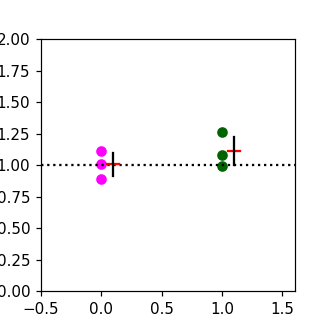

In [15]:
def fold_change(data):
    """
    input is delta delta Ct
    """
    return(2**-data)

fold_change_pos_control = [fold_change(delta_delta_Ct1),
                           fold_change(delta_delta_Ct2),
                           fold_change(delta_delta_Ct3)]

fold_change_exp = [fold_change(delta_delta_Ct4),
                   fold_change(delta_delta_Ct5),
                   fold_change(delta_delta_Ct6)]

mean_pos_control = np.mean(np.array((fold_change_pos_control)))
mean_exp = np.mean(np.array((fold_change_exp)))

std_pos_control = np.std(np.array((fold_change_pos_control)))
std_exp = np.std(np.array((fold_change_exp)))

fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111)

# Plot line at zero
ax.plot([-2, 3], [1,1], c='k', ls=':')

ax.scatter([0,0,0], [fold_change_pos_control], c = 'magenta')
ax.scatter([1,1,1], fold_change_exp, c = 'darkgreen')

# Plot mean bar
ax.plot([.05,.15], [mean_pos_control, mean_pos_control], c='r')
ax.plot([1.05,1.15], [mean_exp, mean_exp], c='r')

# Plot Standard Error
ax.plot([.1, .1], [mean_pos_control-std_pos_control, mean_pos_control+std_pos_control], c='k')
ax.plot([1.1, 1.1], [mean_exp-std_exp, mean_exp+std_exp], c='k')

ax.set_ylim(0,2)
ax.set_xlim(-0.5,1.6)

fig.savefig(Path(savepath, 'Fig2C.svg'))

In [16]:
print(stats.shapiro(fold_change_pos_control)) # Lilliefors requires >3 samples
print(stats.shapiro(fold_change_exp)) # Lilliefors requires >3 samples
print(stats.levene(fold_change_pos_control, fold_change_exp))

print('Use parametric test')
print(stats.ttest_ind(fold_change_pos_control, fold_change_exp))

ShapiroResult(statistic=0.9991697072982788, pvalue=0.9449608325958252)
ShapiroResult(statistic=0.9626055359840393, pvalue=0.6283358335494995)
LeveneResult(statistic=0.051252611877931724, pvalue=0.8319961252356224)
Use parametric test
Ttest_indResult(statistic=-1.0763598525653564, pvalue=0.34235571293116107)


# Export stats

In [17]:
data = [[np.array(fold_change_pos_control), np.array(fold_change_exp)]]
label_list = [['Gal4+', 'Gal4-']]
savename='Fig2C'

shared_func.export_pairwise_test(data, label_list, 
                                 savepath=stat_savepath, savename=savename,
                                 parametric=True)

   Group  n      mean    median       STD       SEM  \
0  Gal4+  3  1.004179  1.007898  0.091253  0.030418   
1  Gal4-  3  1.113537  1.083185  0.110986  0.036995   

                         95% CI on the mean  DOF statistical test  \
0   (0.726547725244808, 1.2818101341562553)  4.0           T-test   
1  (0.7758682563879085, 1.4512056603639774)  NaN              NaN   

   t-statistic   p-value significant  
0     -1.07636  0.342356          NO  
1          NaN       NaN         NaN  
